In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
import joblib


In [2]:
df = pd.read_csv("final/tahko_df.csv")
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2]
0,Kuopio Maaninka,2004,1,1,2004-01-01,21.0,-21.0,0.0,-0.7
1,Kuopio Maaninka,2004,1,2,2004-01-02,21.0,-21.2,0.0,0.9
2,Kuopio Maaninka,2004,1,3,2004-01-03,21.0,-14.8,7.0,1.4
3,Kuopio Maaninka,2004,1,4,2004-01-04,21.0,-11.8,5.0,0.3
4,Kuopio Maaninka,2004,1,5,2004-01-05,23.0,-10.3,7.0,-0.9


In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
df.head()

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],day_of_year
0,2004,1,1,2004-01-01,21.0,-21.0,0.0,-0.7,1
1,2004,1,2,2004-01-02,21.0,-21.2,0.0,0.9,2
2,2004,1,3,2004-01-03,21.0,-14.8,7.0,1.4,3
3,2004,1,4,2004-01-04,21.0,-11.8,5.0,0.3,4
4,2004,1,5,2004-01-05,23.0,-10.3,7.0,-0.9,5


In [4]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [5]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.5292934155729141
Mean Squared Error: 200.6057875075454


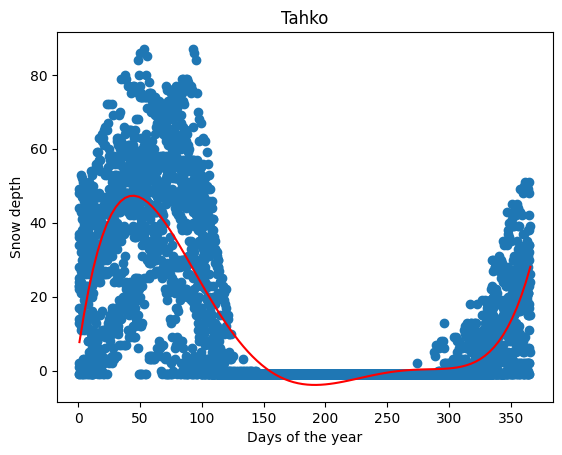

In [10]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 5))

myline = np.linspace(1, 366, 100)

plt.scatter(X_train["day_of_year"], y_train)
plt.plot(myline, mymodel(myline), color='red')
plt.xlabel("Days of the year")
plt.ylabel("Snow depth")
plt.title("Tahko")
plt.show()

In [11]:
snowdept = mymodel(range(7,35))
print(snowdept)

[19.48075108 21.19462878 22.84087568 24.4208326  25.93582522 27.38716411
 28.77614487 30.10404818 31.37213987 32.581671   33.73387796 34.82998254
 35.871192   36.85869914 37.7936824  38.67730595 39.51071971 40.2950595
 41.03144707 41.7209902  42.36478278 42.96390486 43.51942277 44.03238918
 44.50384317 44.93481031 45.32630277 45.67931934]


In [12]:
joblib.dump(model, 'tahko_snow_depth_predictor.pkl')

['tahko_snow_depth_predictor.pkl']